In [1]:
# Install colorama and import all necessary libraries
!pip install colorama

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import colorama
from colorama import Fore
from colorama import Style
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Read in datasets 
## CHANGE TO YOUR OWN PERSONAL PATH
master = pd.read_csv('/content/drive/MyDrive/IndependentProjects/mess_with_scores/master.csv')
scores = pd.read_csv('/content/drive/MyDrive/IndependentProjects/mess_with_scores/scores.csv')

Mounted at /content/drive


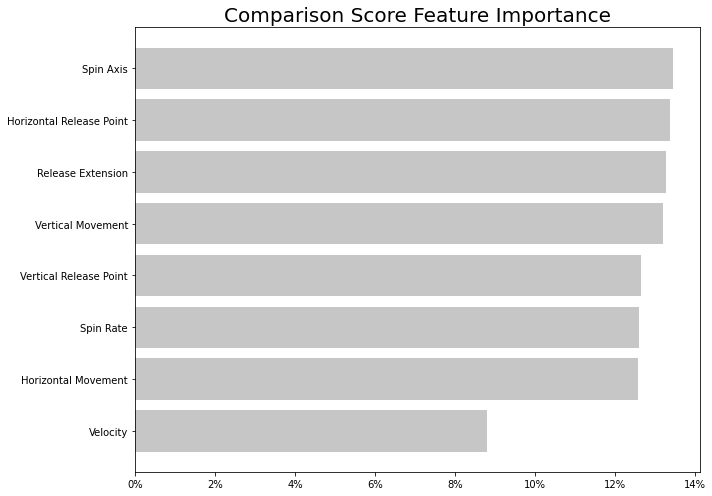

In [ ]:
## This cell plots the weights of each factor in the score composition

# Initialize list for name and value of weights
multipliers_names = {'velo': 'Velocity', 'spin_rate': 'Spin Rate', 'x_break': 'Horizontal Movement', 'z_break': 'Vertical Movement', 'workable_spin_axis': 'Spin Axis', 'rpx': 'Horizontal Release Point', 'rpz': 'Vertical Release Point', 'extension': 'Release Extension'}

# Sorted multipliers from 8/14/2022
multipliers = {'velo': 8.799445500732046, 'spin_rate': 12.621158772953136, 'x_break': 12.58299984215483, 'z_break': 13.212024496125553, 'workable_spin_axis': 13.45230718789009, 'rpx': 13.387290068907882, 'rpz': 12.671419741407046, 'extension': 13.273354389829414}
multipliers = dict(sorted(multipliers.items(), key=lambda item: item[1]))

# Add multiplier names in order
var_names = []
for key in multipliers:
    var_names.append(multipliers_names[key])

# Separate values
var_vals = multipliers.values()

# Initialize plot
fig, axs = plt.subplots(1, 1,
                        figsize = (10,7),
                        tight_layout = True)
    
plt.barh(var_names, var_vals, color='#C6C6C6')

# Adding Title of chart
plt.title('Comparison Score Feature Importance', fontsize=20)

# Convert tick marks to percents
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14], ['0%', '2%', '4%', '6%', '8%', '10%', '12%', '14%'])
  
# Displaying Chart
plt.show()

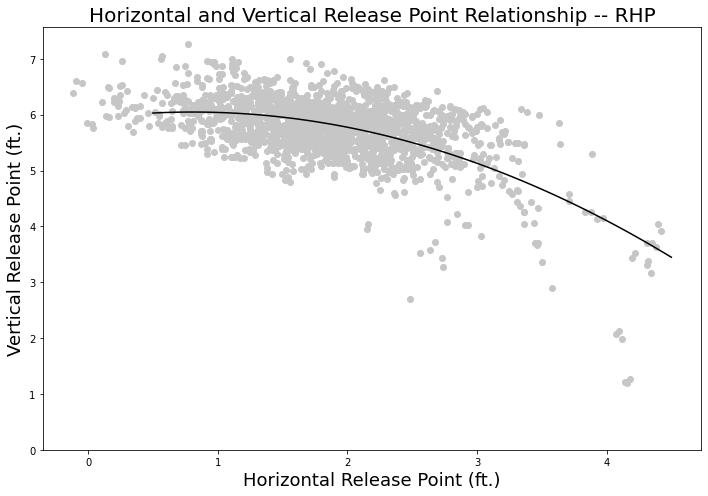

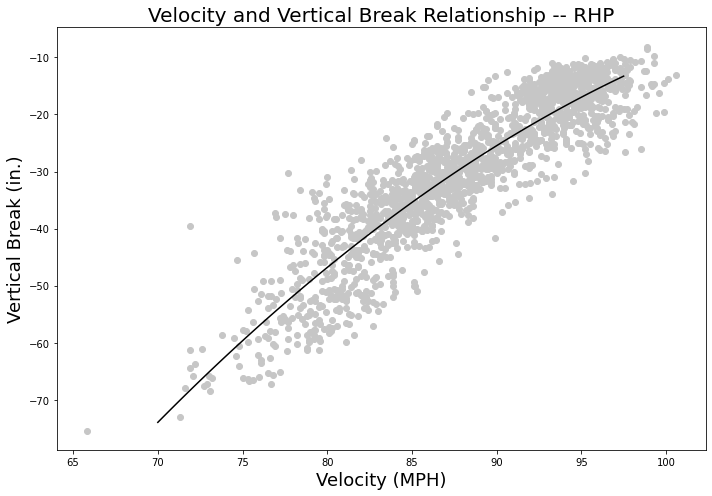

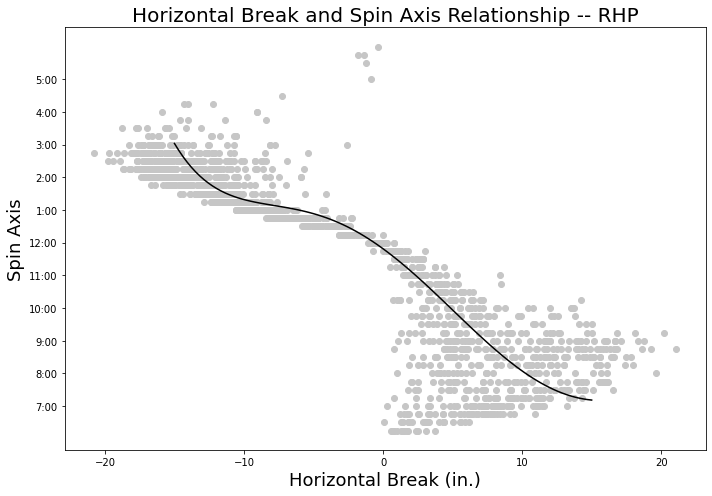

In [ ]:
## This cell plots the relationship between different features

# Filter data to only RHP
r = master[master['hand'] == 'R']

# this section plots the RPx and RPz relationship

model = np.poly1d(np.polyfit(r['rpx'] * -1, r['rpz'], 2))

fig, axs = plt.subplots(1, 1,
                        figsize = (10,7),
                        tight_layout = True)

plt.scatter(r['rpx']*-1, r['rpz'], color='#C6C6C6')

#add fitted polynomial line to scatterplot
polyline = np.linspace(.5, 4.5, 100)
plt.plot(polyline, model(polyline), color='k')

plt.xlabel('Horizontal Release Point (ft.)', fontsize=18)
plt.ylabel('Vertical Release Point (ft.)', fontsize=18)
plt.title('Horizontal and Vertical Release Point Relationship -- RHP', fontsize=20)

plt.yticks([0, 1, 2, 3, 4, 5, 6, 7])


plt.show()
print('')

##############################################################################################################

# this section plots the velocity and z_break relationship

model = np.poly1d(np.polyfit(r['velo'], r['z_break'], 2))

fig, axs = plt.subplots(1, 1,
                        figsize = (10,7),
                        tight_layout = True)

plt.scatter(r['velo'], r['z_break'], color='#C6C6C6')

#add fitted polynomial line to scatterplot
polyline = np.linspace(70, 97.5, 100)
plt.plot(polyline, model(polyline), color='k')

plt.xlabel('Velocity (MPH)', fontsize=18)
plt.ylabel('Vertical Break (in.)', fontsize=18)
plt.title('Velocity and Vertical Break Relationship -- RHP', fontsize=20)

plt.show()
print('')

##############################################################################################################

# this section plots the x_break and spin_axis relationship

model = np.poly1d(np.polyfit(r['x_break'] + 5, r['workable_spin_axis'], 5))
model[0] -= 25

fig, axs = plt.subplots(1, 1,
                        figsize = (10,7),
                        tight_layout = True)

plt.scatter(r['x_break'], r['workable_spin_axis'], color='#C6C6C6')

#add fitted polynomial line to scatterplot
polyline = np.linspace(-15, 15, 100)

plt.plot(polyline, model(polyline), color='k')

plt.xlabel('Horizontal Break (in.)', fontsize=18)
plt.ylabel('Spin Axis', fontsize=18)
plt.title('Horizontal Break and Spin Axis Relationship -- RHP', fontsize=20)

plt.yticks([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150], ['7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '1:00', '2:00', '3:00', '4:00', '5:00'])

plt.show()

In [4]:
## Explore most and least similar pitches

# Find minimum score and print two players and pitches
min_row = scores[scores['score'] == scores['score'].min()].drop_duplicates(['score']).reset_index()
min_id_1 = min_row.at[0, 'unique_id']
min_id_2 = min_row.at[0, 'comp_id']

min_df_1 = master[master['unique_id'] == min_id_1].reset_index()
min_df_2 = master[master['unique_id'] == min_id_2].reset_index()

print(f"The most similar Comparison Score recorded is: {min_df_1.at[0, 'player_name']}'s {min_df_1.at[0, 'pitch_name']} and {min_df_2.at[0, 'player_name']}'s {min_df_2.at[0, 'pitch_name']} -- {min_row.at[0, 'score']}")

# Find maximum score and print two players and pitches

max_row = scores[scores['score'] == scores['score'].max()].drop_duplicates(['score']).reset_index()
max_id_1 = max_row.at[0, 'unique_id']
max_id_2 = max_row.at[0, 'comp_id']

max_df_1 = master[master['unique_id'] == max_id_1].reset_index()
max_df_2 = master[master['unique_id'] == max_id_2].reset_index()

print(f"The least similar Comparison Score recorded is: {max_df_1.at[0, 'player_name']}'s {max_df_1.at[0, 'pitch_name']} and {max_df_2.at[0, 'player_name']}'s {max_df_2.at[0, 'pitch_name']} -- {max_row.at[0, 'score']}")

The most similar Comparison Score recorded is: Garrett, Amir's Four-seam Fastball and Davis, Austin's Four-seam Fastball -- 0.0326834321744597
The least similar Comparison Score recorded is: Rogers, Tyler's Four-seam Fastball and Fairbanks, Pete's Four-seam Fastball -- 3.4381083882325734


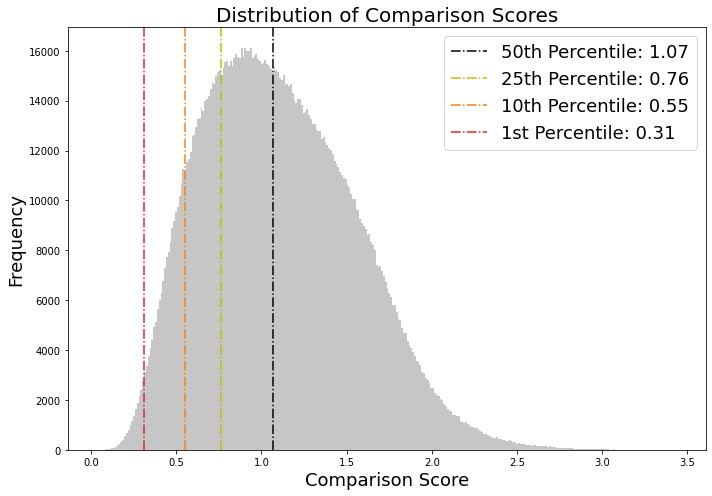

In [5]:
## This cell plots the distribution of all recorded scores

# Get data into list format -- drops duplicates because every score is recorded twice since a score is shared between two players
data_list = scores['score'].unique().tolist()

# Get value representing different percentiles of scores
median = np.quantile(data_list, .5)
q1 = np.quantile(data_list, .25)
q3 = np.quantile(data_list, .75)
tenth = np.quantile(data_list, .1)
first = np.quantile(data_list, .01)

# Create number of bins based on data distribution
bin_width = (2*(q3-q1)) / (len(data_list) ** (1 / 3))
n_bins = int(np.ceil((max(data_list) - min(data_list)) / bin_width))

# Create Actual Plot
fig, axs = plt.subplots(1, 1,
                        figsize = (10,7),
                        tight_layout = True)
axs.hist(data_list, bins = n_bins, color='#C6C6C6')

# Create lines for median, 75th, 90th, and 99th percentiles
plt.axvline(median, color='k', linestyle='-.')
plt.axvline(q1, color='y', linestyle='-.')
plt.axvline(tenth, color='tab:orange', linestyle='-.')
plt.axvline(first, color='tab:red', linestyle='-.')

# Add necesary text to histogram
plt.legend([f'50th Percentile: {median:.2f}', f'25th Percentile: {q1:.2f}', f'10th Percentile: {tenth:.2f}', f'1st Percentile: {first:.2f}'], fontsize=18)
plt.xlabel('Comparison Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title(f'Distribution of Comparison Scores', fontsize=20)

# Display plot
plt.show()

In [ ]:
## This cell prints the number of each type of uniquness categorization

n_unicorn = len(master[master['uniqueness'] == 'Unicorn'])
n_extremely_rare = len(master[master['uniqueness'] == 'Extremely Rare'])
n_very_rare = len(master[master['uniqueness'] == 'Very Rare'])
n_rare = len(master[master['uniqueness'] == 'Rare'])
n_uncommon = len(master[master['uniqueness'] == 'Uncommon'])
n_common = len(master[master['uniqueness'] == 'Common'])

print(n_unicorn)
print(n_extremely_rare)
print(n_very_rare)
print(n_rare)
print(n_uncommon)
print(n_common)

33
67
103
260
520
1435


In [6]:
## This cell prints the list of pitches in a certain categorization, colored by vertical release point uniqueness -- red 3+ SD from avg, yellow > 1.5 and < 3, and green <= 1.5

rp = {'R': {}, 'L': {}}
hands = ['R', 'L']

# Get average and std for rpz
for hand in hands:
    hand_master = master[master['hand'] == hand]

    rp[hand]['avg_rpz'] = hand_master['rpz'].mean()
    rp[hand]['std_rpz'] = hand_master['rpz'].std()

## THIS LINE TO EDIT WHICH CATEGORIZATION OF UNIQUENESS
relevant_data = master[master['uniqueness'] == 'Unicorn']

print('\nLowest Scores with RP')

for row in relevant_data.index:
    name = relevant_data.at[row, 'player_name']
    pitch = relevant_data.at[row, 'pitch_name']
    hand = relevant_data.at[row, 'hand']

    rpz = relevant_data.at[row, 'rpz']

    # Find STD away from mean
    sd_away = abs(rpz - rp[hand]['avg_rpz']) / rp[hand]['std_rpz']

    # Categorize STD from mean
    unique_rpz = '<1.5'
    if sd_away > 1.5:
        unique_rpz = '1.5-3'
    if sd_away > 3:
        unique_rpz = '3+'

    # Find lowest score
    relevant_scores = scores[scores['unique_id'] == relevant_data.at[row, 'unique_id']]
    closest = relevant_scores['score'].min()

    # Print by color
    if unique_rpz == '3+':
        print(Fore.RED + f'{name} ({hand}) {pitch}: {closest:.2f}' + Style.RESET_ALL)
    elif unique_rpz == '1.5-3':
        print(Fore.YELLOW + f'{name} ({hand}) {pitch}: {closest:.2f}' + Style.RESET_ALL)
    else:
        print(Fore.GREEN + f'{name} ({hand}) {pitch}: {closest:.2f}' + Style.RESET_ALL)


Lowest Scores with RP
Hill, Rich (L) Slider: 0.72
Smith, Joe (R) Sinker: 0.59
Cishek, Steve (R) Four-seam Fastball: 0.56
Cishek, Steve (R) Slider: 0.74
Coulombe, Danny (L) Changeup: 0.52
Chapman, Aroldis (L) Splitter: 0.81
Rodriguez, Joely (L) Changeup: 0.52
Loup, Aaron (L) Curveball: 0.55
Loup, Aaron (L) Cutter: 0.61
Thielbar, Caleb (L) Changeup: 0.59
Kolarek, Adam (L) Changeup: 0.61
Smyly, Drew (L) Curveball: 0.67
Moll, Sam (L) Slider: 0.79
Moll, Sam (L) Sinker: 0.62
Steckenrider, Drew (R) Curveball: 0.50
Mills, Alec (R) Curveball: 0.56
Alvarado, Jose (L) Curveball: 0.67
Williams, Devin (R) Changeup: 0.60
Cimber, Adam (R) Four-seam Fastball: 0.61
Cimber, Adam (R) Slider: 0.53
Cimber, Adam (R) Sinker: 0.57
Rogers, Tyler (R) Four-seam Fastball: 0.76
Rogers, Tyler (R) Slider: 0.57
Rogers, Tyler (R) Sinker: 0.57
Hill, Tim (L) Four-seam Fastball: 0.60
Hill, Tim (L) Slider: 0.94
Hill, Tim (L) Sinker: 0.67
Falter, Bailey (L) Sinker: 0.52
Kelley, Trevor (R) Slider: 0.55
Jackson, Zach (R) Sl

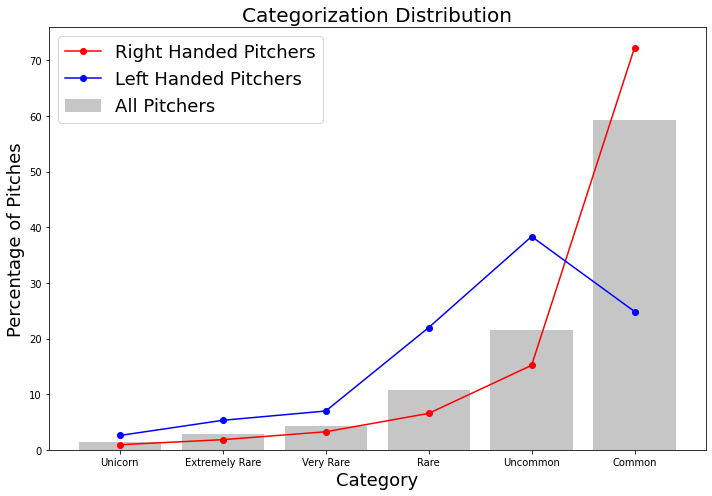

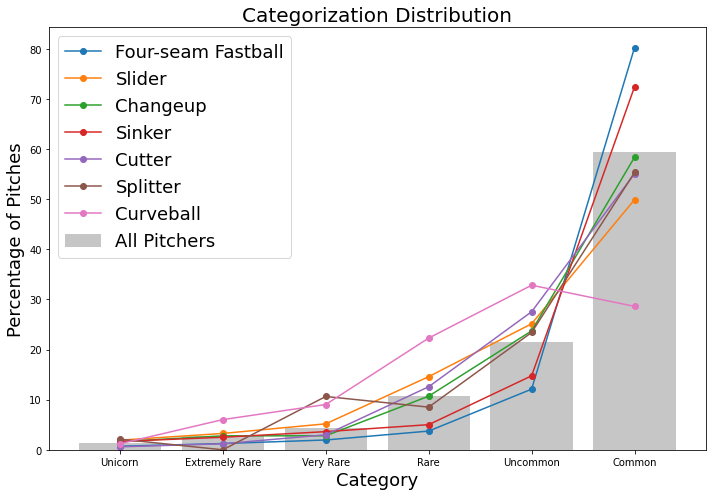

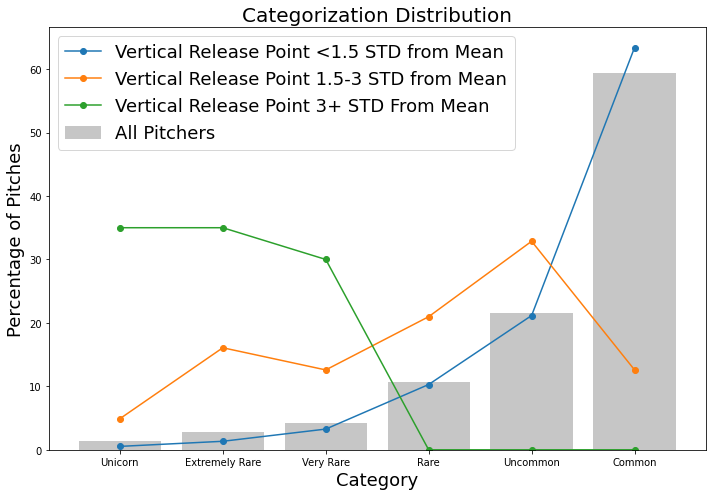

In [ ]:
## This cell displays the breakdown of uniquenss both by pitch type and hand

# Returns total categorization % by given filter
def find_totals(temp_df):
    # If filtered df is empty return and emtpy list
    if len(temp_df) == 0:
        return []

    temp_unicorn = 100 * len(temp_df[temp_df['uniqueness'] == 'Unicorn']) / len(temp_df)
    temp_extremely_rare = 100 * len(temp_df[temp_df['uniqueness'] == 'Extremely Rare']) / len(temp_df)
    temp_very_rare = 100 * len(temp_df[temp_df['uniqueness'] == 'Very Rare']) / len(temp_df)
    temp_rare = 100 * len(temp_df[temp_df['uniqueness'] == 'Rare']) / len(temp_df)
    temp_uncommon = 100 * len(temp_df[temp_df['uniqueness'] == 'Uncommon']) / len(temp_df)
    temp_common = 100 * len(temp_df[temp_df['uniqueness'] == 'Common']) / len(temp_df)

    return [temp_unicorn, temp_extremely_rare, temp_very_rare, temp_rare, temp_uncommon, temp_common]

# Finds the overall percentages
totals = find_totals(master)
# Finds R/L percentages
R_totals = find_totals(master[master['hand'] == 'R'])
L_totals = find_totals(master[master['hand'] == 'L'])
# Finds each pitch percentages
ff_totals = find_totals(master[master['pitch_id'] == 'ff'])
sl_totals = find_totals(master[master['pitch_id'] == 'sl'])
ch_totals = find_totals(master[master['pitch_id'] == 'ch'])
si_totals = find_totals(master[master['pitch_id'] == 'si'])
fc_totals = find_totals(master[master['pitch_id'] == 'fc'])
fs_totals = find_totals(master[master['pitch_id'] == 'fs'])
cu_totals = find_totals(master[master['pitch_id'] == 'cu'])
kn_totals = find_totals(master[master['pitch_id'] == 'kn'])
# Finds RP percentages
normal_rp_totals = find_totals(master[master['rpz_categorization'] == '<1.5'])
semi_normal_rp_totals = find_totals(master[master['rpz_categorization'] == '1.5-3'])
not_normal_rp_totals = find_totals(master[master['rpz_categorization'] == '>3'])

# Initialize the categories
categories = ['Unicorn', 'Extremely Rare', 'Very Rare', 'Rare', 'Uncommon', 'Common']

## Plot the R/L values
fig, axs = plt.subplots(1, 1,
                        figsize = (10,7),
                        tight_layout = True)
# Plot bar chart for totals (grey) and R/L as lines
axs.bar(categories, totals, color='#C6C6C6', label='All Pitchers')
plt.plot(categories, R_totals, marker='o', color='r', label='Right Handed Pitchers')
plt.plot(categories, L_totals, marker='o', color='b', label='Left Handed Pitchers')
# Title and labels
plt.title('Categorization Distribution', fontsize=20)
plt.xlabel('Category', fontsize=18)
plt.ylabel('Percentage of Pitches', fontsize=18)
plt.legend(fontsize=18)
# Show plot
plt.show()
print('\n')

## Plot the pitch values
fig, axs = plt.subplots(1, 1,
                        figsize = (10,7),
                        tight_layout = True)
# Plot hte bar chart for totals (grey) and R/L as lines
axs.bar(categories, totals, color='#C6C6C6', label='All Pitchers')
plt.plot(categories, ff_totals, marker='o', label='Four-seam Fastball')
plt.plot(categories, sl_totals, marker='o', label='Slider')
plt.plot(categories, ch_totals, marker='o', label='Changeup')
plt.plot(categories, si_totals, marker='o', label='Sinker')
plt.plot(categories, fc_totals, marker='o', label='Cutter')
plt.plot(categories, fs_totals, marker='o', label='Splitter')
plt.plot(categories, cu_totals, marker='o', label='Curveball')
# Don't plot kn if emtpy
if len(kn_totals) > 0:
    plt.plot(categories, kn_totals, marker='o', label='Knuckleball')
# Title and labels
plt.title('Categorization Distribution', fontsize=20)
plt.xlabel('Category', fontsize=18)
plt.ylabel('Percentage of Pitches', fontsize=18)
# Legend
plt.legend(fontsize=18)
# Show plot
plt.show()
print('\n')

## Plot the rpz values
fig, axs = plt.subplots(1, 1,
                        figsize = (10,7),
                        tight_layout = True)
# Plot hte bar chart for totals (grey) and R/L as lines
axs.bar(categories, totals, color='#C6C6C6', label='All Pitchers')
plt.plot(categories, normal_rp_totals, marker='o', label='Vertical Release Point <1.5 STD from Mean')
plt.plot(categories, semi_normal_rp_totals, marker='o', label='Vertical Release Point 1.5-3 STD from Mean')
plt.plot(categories, not_normal_rp_totals, marker='o', label='Vertical Release Point 3+ STD From Mean')

# Title and labels
plt.title('Categorization Distribution', fontsize=20)
plt.xlabel('Category', fontsize=18)
plt.ylabel('Percentage of Pitches', fontsize=18)
# Legend
plt.legend(fontsize=18)
# Show plot
plt.show()

In [ ]:
## This cell prints the average of an attribute for all pitches

attribute = 'spin_rate'

def print_avg(master, attribute):
    print(f"Average {attribute} by Pitch Type:")
    print(f"ff: {master[master['pitch_id'] == 'ff'][attribute].mean()}")
    print(f"sl: {master[master['pitch_id'] == 'sl'][attribute].mean()}")
    print(f"si: {master[master['pitch_id'] == 'si'][attribute].mean()}")
    print(f"cu: {master[master['pitch_id'] == 'cu'][attribute].mean()}")
    print(f"fc: {master[master['pitch_id'] == 'fc'][attribute].mean()}")
    print(f"fs: {master[master['pitch_id'] == 'fs'][attribute].mean()}")
    print(f"ch: {master[master['pitch_id'] == 'ch'][attribute].mean()}")

print_avg(master, attribute)

Average spin_rate by Pitch Type:
ff: 2251.7562277580073
sl: 2400.531669865643
si: 2155.1810584958216
cu: 2467.237951807229
fc: 2342.670658682635
fs: 1364.4468085106382
ch: 1738.8953488372092


In [7]:
## This cell adds the rpz categorization to the entire master dataframe

# Filter by hand
rhp = master[master['hand'] == 'R']
lhp = master[master['hand'] == 'L']

# Find means
rpz_mean_r = rhp['rpz'].mean()
rpz_mean_l = lhp['rpz'].mean()

# Find STD
rpz_std_r = rhp['rpz'].std()
rpz_std_l = lhp['rpz'].std()

# Initialize list to make column
unique_rps = []

for row in master.index:

    # Use apprpropriate mean and STD
    if master.at[row, 'hand'] == 'R':
        rpz_mean = rpz_mean_r
        rpz_std = rpz_std_r
    else:
        rpz_mean = rpz_mean_l
        rpz_std = rpz_std_l

    # Find Z Score
    z_score = abs((master.at[row, 'rpz'] - rpz_mean) / rpz_std)

    # Categorize Z Score
    unique_rp = '<1.5'
    if z_score > 1.5:
        unique_rp = '1.5-3'
    if z_score > 3:
        unique_rp = '>3'

    unique_rps.append(unique_rp)

master['rpz_categorization'] = unique_rps

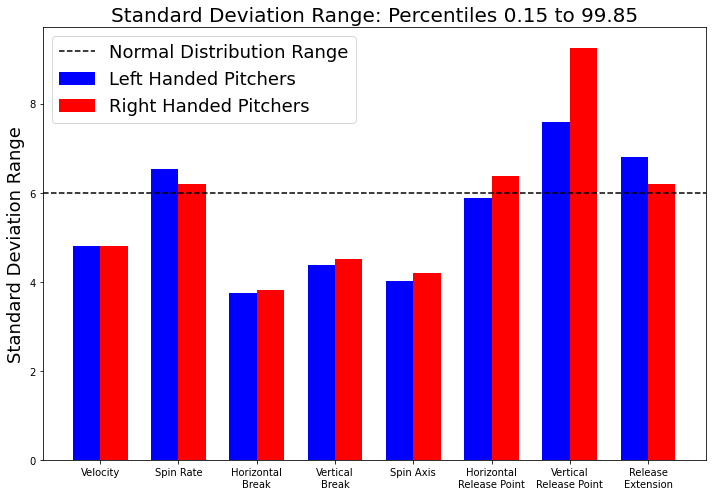

In [ ]:
## This cell plots the distribution of each attribute factored into the comparison score

# Create lists for attribute name and formatted name
attributes = ['velo', 'spin_rate', 'x_break', 'z_break', 'workable_spin_axis', 'rpx', 'rpz', 'extension']
formatted_labels = ['Velocity', 'Spin Rate', 'Horizontal\nBreak', 'Vertical\nBreak', 'Spin Axis', 'Horizontal\nRelease Point', 'Vertical\nRelease Point', 'Release\nExtension']

# Split into RHP and LHP
ranges = {'R': [], 'L': []}
hands = ['R', 'L']

# Iterate through all hands and attributes to find range between .15th and 99.85th percentile
for hand in hands:

    filtered = master[master['hand'] == hand]

    for attribute in attributes:
        # Make data into list
        data_list = filtered[attribute].tolist()
        # Find avg and std
        avg = filtered[attribute].mean()
        std = filtered[attribute].std()

        # Find 99.85th and .15th percetile
        norm_high = np.quantile(data_list, .9985)
        norm_low = np.quantile(data_list, .0015)

        # Find std range
        low_comp = (norm_low - avg) / std
        high_comp = (norm_high - avg) / std
        range = high_comp - low_comp

        ranges[hand].append(range)

fig, axs = plt.subplots(1, 1,
                        figsize = (10,7),
                        tight_layout = True)

x = np.arange(len(formatted_labels))
width = .35

# Make clustered bar chart with normal distribution represented as line
axs.bar(x-width/2, ranges['L'], width, label='Left Handed Pitchers', color='b')
axs.bar(x+width/2, ranges['R'], width, label='Right Handed Pitchers', color='r')
plt.axhline(y=6, linestyle='dashed', label='Normal Distribution Range', color='k')

# Add labels
axs.set_ylabel('Standard Deviation Range', fontsize=18)
axs.set_title('Standard Deviation Range: Percentiles 0.15 to 99.85', fontsize=20)
axs.set_xticks(x)
axs.set_xticklabels(formatted_labels)
axs.legend(fontsize=18)

plt.show()

In [8]:
## This cell loads the dataframe that can be used to create a regression based on uniqueness

# Turn unique player ids into list
all_players = master['player_id'].unique().tolist()

# Initialize columns and data lists for regression
columns = ['player_id', 'player_name', 'hand', 'era', 'k%', 'barrel%', 'n_pitches', 'rpz_categorization', 'run_value_per_100', 'closest_score', 'scores_under_50']
data = []

# Iterate through all players and create row for regression dataframe
for player in all_players:
    
    # Filter data to only current player's pitches
    relevant_data = master[master['player_id'] == player].copy().reset_index()

    hand = relevant_data.at[0, 'hand']

    temp_data = []

    # Add player_id, name, hand, era, k%, barrel%, number of pitches thrown, and rpz categorzation to row
    temp_data.append(relevant_data.at[0, 'player_id'])
    temp_data.append(relevant_data.at[0, 'player_name'])
    temp_data.append(hand)
    temp_data.append(relevant_data.at[0, 'era'])    
    temp_data.append(relevant_data.at[0, 'k%'])    
    temp_data.append(relevant_data.at[0, 'barrel%'])
    
    temp_data.append(len(relevant_data))

    temp_data.append(relevant_data.at[0, 'rpz_categorization'])

    # Create cumulative values for closest score, number of scores under 50, and rv_per_100 by weighted average of each of the player's individual pitch values according to how often they throw that pitch
    closest = 0
    n_under_50 = 0
    rv_per_100 = 0

    total_pitches = relevant_data['total_pitches'].sum()

    for pitch in relevant_data.index:

        total_ind_pitches = relevant_data.at[pitch, 'total_pitches']
        proportion = total_ind_pitches / total_pitches

        rv_per_100 += (relevant_data.at[pitch, 'run_value_per_100'] * proportion)
        closest += (relevant_data.at[pitch, 'closest_score'] * proportion)
        n_under_50 += (relevant_data.at[pitch, 'scores_under_50'] * proportion)

    # Add aggregations of rv_per_100, closest pitch, and n_under_50
    temp_data.append(rv_per_100)
    temp_data.append(closest)
    temp_data.append(n_under_50)

    data.append(temp_data)

uniqueness_regression = pd.DataFrame(data, columns=columns)

uniqueness_regression

,player_id,player_name,hand,era,k%,barrel%,n_pitches,rpz_categorization,run_value_per_100,closest_score,scores_under_50
0,425794,"Wainwright, Adam",R,3.27,19.8,8.0,5,<1.5,-0.516409,0.279475,92.790031
1,425844,"Greinke, Zack",R,4.13,13.8,7.4,6,<1.5,0.259243,0.202266,119.915772
2,434378,"Verlander, Justin",R,1.95,25.0,7.3,4,1.5-3,-1.418424,0.249266,71.481481
3,434671,"Sanchez, Anibal",R,7.20,16.3,8.2,6,<1.5,1.162218,0.264931,24.533795
4,445276,"Jansen, Kenley",R,3.25,33.1,5.8,3,1.5-3,-0.878940,0.321153,21.661088
...,...,...,...,...,...,...,...,...,...,...,...
643,682051,"Hill, Garrett",R,4.22,11.4,9.8,5,<1.5,0.488451,0.185958,161.600000
644,682171,"Murfee, Penn",R,2.49,29.7,5.7,3,1.5-3,-1.594553,0.401131,2.346369
645,686752,"Pepiot, Ryan",R,4.26,25.7,12.9,3,<1.5,0.102756,0.189152,192.149606
646,689225,"Brieske, Beau",R,4.19,15.9,10.4,5,<1.5,-0.064413,0.187953,116.917638


In [9]:
## This cell is for setting a qualifier for the uniquenss regression -- currently set to the fastest pitch a pitcher throws being over 96 mph

# Create list of all player ids
all_players = master['player_id'].unique().tolist()

# Create empty list of max_velos
max_velos = []

# Find maximum velo for every pitcher
for player in all_players:
    data = master[master['player_id'] == player]
    max_velo = data['velo'].max()
    max_velos.append(max_velo)


uniqueness_regression['max_velos'] = max_velos

# Filter to qualified players
qualified = uniqueness_regression[uniqueness_regression['max_velos'] > 96]

qualified.corr()

,player_id,era,k%,barrel%,n_pitches,run_value_per_100,closest_score,scores_under_50,max_velos
player_id,1.000000,0.079418,-0.065282,-0.040447,-0.053309,0.073229,-0.023663,0.039614,-0.076612
era,0.079418,1.000000,-0.547890,0.222150,-0.229000,0.857173,-0.239076,0.151223,-0.295902
k%,-0.065282,-0.547890,1.000000,-0.036261,-0.005457,-0.620719,0.408812,-0.373881,0.343726
barrel%,-0.040447,0.222150,-0.036261,1.000000,-0.056478,0.213071,0.040387,-0.131772,-0.107440
n_pitches,-0.053309,-0.229000,-0.005457,-0.056478,1.000000,-0.098953,-0.154370,0.278367,-0.133106
run_value_per_100,0.073229,0.857173,-0.620719,0.213071,-0.098953,1.000000,-0.269356,0.244513,-0.333822
closest_score,-0.023663,-0.239076,0.408812,0.040387,-0.154370,-0.269356,1.000000,-0.796858,0.377225
scores_under_50,0.039614,0.151223,-0.373881,-0.131772,0.278367,0.244513,-0.796858,1.000000,-0.246433
max_velos,-0.076612,-0.295902,0.343726,-0.107440,-0.133106,-0.333822,0.377225,-0.246433,1.000000


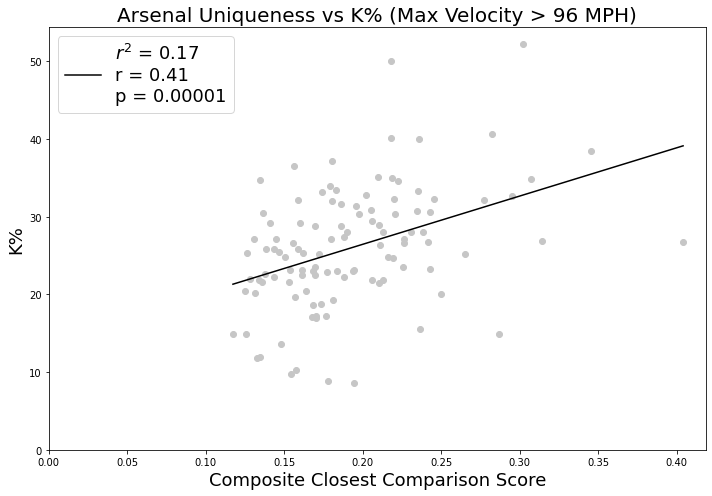

In [11]:
## This cell plots data with line of best fit -- right now set as k% and closest score

# Set comparison and outcome metric
comparison_metric = 'closest_score'
outcome_metric = 'k%'

# Find R and p value of value for comparison
r, p = pearsonr(qualified[comparison_metric], qualified[outcome_metric])

x = qualified[comparison_metric]
y = qualified[outcome_metric]

# Calculate r^2
r2 = r ** 2

fig, axs = plt.subplots(1, 1,
                        figsize = (10,7),
                        tight_layout = True)

# Create scatterplot
plt.scatter(x, y, color='#C6C6C6')
plt.xlabel('Composite Closest Comparison Score', fontsize=18)
plt.ylabel('K%', fontsize=18)
plt.title('Arsenal Uniqueness vs K% (Max Velocity > 96 MPH)', fontsize=20)

min_x = min(x)
max_x = max(x)
lin_x = np.linspace(min_x, max_x, 1000)

# Create line of best fit for agg
m, b = np.polyfit(x, y, 1)

plt.plot(lin_x, m*lin_x + b, 'k', label=f'$r^{2}$ = {r2:.2f}\nr = {r:.2f}\np = {p:.5f}')

# Fit x and y tick marks -- set for closest_score and k% currently
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
plt.yticks([0, 10, 20, 30, 40, 50])

plt.legend(fontsize=18)

plt.show()